In [100]:
#Importing all relevant librabries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly 

In [101]:
#Importing dataset
df= pd.read_csv('flights_sample_3m.csv')

In [102]:
#Previewing dataset
df.sample(20)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
169883,3/7/2021,Republic Airline,Republic Airline: YX,YX,20452,5804,CMH,"Columbus, OH",LGA,"New York, NY",...,0,106.0,99.0,78.0,479,0.0,0.0,22.0,0.0,0.0
445377,9/17/2021,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2103,ELP,"El Paso, TX",DFW,"Dallas/Fort Worth, TX",...,0,108.0,97.0,76.0,551,NaN,0.0,0.0,0.0,0.0
632586,5/14/2023,Envoy Air,Envoy Air: MQ,MQ,20398,3463,AGS,"Augusta, GA",DFW,"Dallas/Fort Worth, TX",...,0,177.0,149.0,127.0,874,NaN,NaN,NaN,NaN,NaN
654193,7/14/2023,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1791,ORD,"Chicago, IL",PHL,"Philadelphia, PA",...,0,127.0,117.0,84.0,678,NaN,NaN,NaN,NaN,NaN
25783,5/5/2021,JetBlue Airways,JetBlue Airways: B6,B6,20409,2353,JFK,"New York, NY",PBI,"West Palm Beach/Palm Beach, FL",...,0,175.0,166.0,149.0,1028,44.0,0.0,8.0,0.0,0.0
98627,9/6/2020,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,5369,DEN,"Denver, CO",SAT,"San Antonio, TX",...,0,136.0,119.0,106.0,794,2.0,0.0,0.0,0.0,32.0
385012,4/3/2019,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,546,RNO,"Reno, NV",PHX,"Phoenix, AZ",...,0,103.0,97.0,78.0,601,NaN,NaN,NaN,NaN,NaN
288163,10/9/2022,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1947,RDU,"Raleigh/Durham, NC",IAH,"Houston, TX",...,0,178.0,204.0,157.0,1042,NaN,NaN,NaN,NaN,NaN
924851,4/30/2019,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,671,DFW,"Dallas/Fort Worth, TX",LAS,"Las Vegas, NV",...,0,178.0,171.0,148.0,1055,NaN,NaN,NaN,NaN,NaN
215655,12/6/2020,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2788,COS,"Colorado Springs, CO",DFW,"Dallas/Fort Worth, TX",...,0,126.0,116.0,89.0,592,NaN,NaN,NaN,NaN,NaN


In [103]:
#Fetching information on the nature of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   FL_DATE                  1048575 non-null  object 
 1   AIRLINE                  1048575 non-null  object 
 2   AIRLINE_DOT              1048575 non-null  object 
 3   AIRLINE_CODE             1048575 non-null  object 
 4   DOT_CODE                 1048575 non-null  int64  
 5   FL_NUMBER                1048575 non-null  int64  
 6   ORIGIN                   1048575 non-null  object 
 7   ORIGIN_CITY              1048575 non-null  object 
 8   DEST                     1048575 non-null  object 
 9   DEST_CITY                1048575 non-null  object 
 10  CRS_DEP_TIME             1048575 non-null  int64  
 11  DEP_TIME                 1021528 non-null  float64
 12  DEP_DELAY                1021519 non-null  float64
 13  TAXI_OUT                 1021104 non-null 

In [104]:
#Identifying the column fields
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

In [105]:
#Previewing columns that did not display in our initial preview
df[['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE','DIVERTED','CRS_ELAPSED_TIME',]].head(20)

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME
0,1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501.0,1447.0,-14.0,0.0,NaN,0,186.0
1,2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315.0,2310.0,-5.0,0.0,NaN,0,235.0
2,954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252.0,1252.0,0.0,0.0,NaN,0,118.0
3,1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829.0,1853.0,24.0,0.0,NaN,0,260.0
4,1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041.0,2040.0,-1.0,0.0,NaN,0,181.0
5,1010,1237.0,147.0,15.0,1252.0,1328.0,3.0,1110.0,1331.0,141.0,0.0,NaN,0,60.0
6,1010,1001.0,-9.0,23.0,1024.0,1122.0,8.0,1159.0,1130.0,-29.0,0.0,NaN,0,109.0
7,1643,1637.0,-6.0,22.0,1659.0,1927.0,41.0,1945.0,2008.0,23.0,0.0,NaN,0,122.0
8,530,527.0,-3.0,11.0,538.0,658.0,8.0,717.0,706.0,-11.0,0.0,NaN,0,227.0
9,2125,2116.0,-9.0,19.0,2135.0,2353.0,3.0,2355.0,2356.0,1.0,0.0,NaN,0,210.0


# Q.1

In [106]:
# Defining numerical attributes
numerical_attributes = ['DEP_DELAY', 'TAXI_OUT','TAXI_IN','ARR_DELAY','CRS_ELAPSED_TIME','ELAPSED_TIME', 'AIR_TIME',
                        'DISTANCE', 'DELAY_DUE_CARRIER','DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
                        'DELAY_DUE_LATE_AIRCRAFT']

# Defining categorical attributes
categorical_attributes = ['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE','ORIGIN', 'ORIGIN_CITY', 'DEST','DEST_CITY',
                          'CRS_DEP_TIME', 'DEP_TIME','WHEELS_OFF','WHEELS_ON','CRS_ARR_TIME', 'ARR_TIME','CANCELLATION_CODE',
                         'DOT_CODE','FL_NUMBER','CANCELLED','DIVERTED']

# Defining all attributes
all_attributes = numerical_attributes + categorical_attributes

# Creating variable for numerical attributes
Flight_Num = df[numerical_attributes]

# Creating variable for categorical attributes
Flight_Cat = df[categorical_attributes]

# Creating variable for both attributes
Flight_Full = df[all_attributes]

In [107]:
#Previewing newly assigned variable 
Flight_Cat

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,ARR_TIME,CANCELLATION_CODE,DOT_CODE,FL_NUMBER,CANCELLED,DIVERTED
0,1/9/2019,United Air Lines Inc.,United Air Lines Inc.: UA,UA,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,1210.0,1443.0,1501.0,1447.0,NaN,19977,1562,0.0,0
1,11/19/2022,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,2123.0,2232.0,2315.0,2310.0,NaN,19790,1149,0.0,0
2,7/22/2022,United Air Lines Inc.,United Air Lines Inc.: UA,UA,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,1020.0,1247.0,1252.0,1252.0,NaN,19977,459,0.0,0
3,3/6/2023,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,1635.0,1844.0,1829.0,1853.0,NaN,19790,2295,0.0,0
4,2/23/2020,Spirit Air Lines,Spirit Air Lines: NK,NK,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,1853.0,2026.0,2041.0,2040.0,NaN,20416,407,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3/9/2020,American Airlines Inc.,American Airlines Inc.: AA,AA,PHX,"Phoenix, AZ",SJC,"San Jose, CA",2030,2140.0,2151.0,2322.0,2230.0,2325.0,NaN,19805,2108,0.0,0
1048571,1/27/2019,Endeavor Air Inc.,Endeavor Air Inc.: 9E,9E,HPN,"White Plains, NY",ATL,"Atlanta, GA",1130,1120.0,1133.0,1357.0,1407.0,1404.0,NaN,20363,5482,0.0,0
1048572,5/7/2021,American Airlines Inc.,American Airlines Inc.: AA,AA,CLT,"Charlotte, NC",BDL,"Hartford, CT",1445,1440.0,1452.0,1624.0,1647.0,1629.0,NaN,19805,2345,0.0,0
1048573,12/19/2022,Envoy Air,Envoy Air: MQ,MQ,MIA,"Miami, FL",GSO,"Greensboro/High Point, NC",1935,2040.0,2058.0,2243.0,2147.0,2252.0,NaN,20398,3754,0.0,0


In [108]:
# Describing the shape of Numerical attributes
Flight_Num.shape

(1048575, 13)

In [109]:
# Describing the shape of Categorical attributes
Flight_Cat.shape

(1048575, 19)

In [110]:
# Describing the shape of Both attributes
Flight_Full.shape

(1048575, 32)

# Q. 2

The variables in Flight_Full consist of categorical variables and it's subtype of mostly nominal variables such as 'AIRLINE'
and'ORIGIN CITY' as well as ordinal variables consisting of attributes such as 'DEPT_TIME' and 'WHEELS OFF'
The Numerical variables also consists of discrete variables such as 'DOT CODE' and 'FL-NUMBER' as well as continuos variables 
such as 'DISTANCE', 'AIRTIME' and 'ELAPSED TIME'

In [111]:
# Converting numerical_attributes and categorical_attributes to sets for faster lookup
numerical_set = set(numerical_attributes)
categorical_set = set(categorical_attributes)

# Separating numerical and categorical columns
numerical_cols = [col for col in Flight_Full.columns if col in numerical_set]
categorical_cols = [col for col in Flight_Full.columns if col in categorical_set]

# Describing the variable types using the info() method
Flight_Full_info = Flight_Full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   DEP_DELAY                1021519 non-null  float64
 1   TAXI_OUT                 1021104 non-null  float64
 2   TAXI_IN                  1020709 non-null  float64
 3   ARR_DELAY                1018570 non-null  float64
 4   CRS_ELAPSED_TIME         1048568 non-null  float64
 5   ELAPSED_TIME             1018570 non-null  float64
 6   AIR_TIME                 1018570 non-null  float64
 7   DISTANCE                 1048575 non-null  int64  
 8   DELAY_DUE_CARRIER        187272 non-null   float64
 9   DELAY_DUE_WEATHER        279610 non-null   float64
 10  DELAY_DUE_NAS            279610 non-null   float64
 11  DELAY_DUE_SECURITY       279610 non-null   float64
 12  DELAY_DUE_LATE_AIRCRAFT  279609 non-null   float64
 13  FL_DATE                  1048575 non-null 

In [112]:
# Checking for inconsistencies or unexpected data types
unexpected_data_types = []
for col in Flight_Full.columns:
    if col in numerical_cols and Flight_Full[col].dtype != 'float64' and Flight_Full[col].dtype != 'int64':
        unexpected_data_types.append((col, Flight_Full[col].dtype))
    elif col in categorical_cols and Flight_Full[col].dtype != 'object':
        unexpected_data_types.append((col, Flight_Full[col].dtype))

if unexpected_data_types:
    print("Unexpected data types:")
    for col, dtype in unexpected_data_types:
        print(f"{col}: {dtype}")
else:
    print("No unexpected data types found.")


Unexpected data types:
CRS_DEP_TIME: int64
DEP_TIME: float64
WHEELS_OFF: float64
WHEELS_ON: float64
CRS_ARR_TIME: float64
ARR_TIME: float64
DOT_CODE: int64
FL_NUMBER: int64
CANCELLED: float64
DIVERTED: int64


The unexpected data types returned all seemed to be in the categorical variable group representing Time. Time is represented 
using strings and float data types and these are not the appropriate data types to represent time.

   # Q. 3

In [113]:
# Checking for missing values
missing_values = Flight_Full.isna().sum()

# Filtering out attributes with missing values
attributes_with_missing_values = missing_values[missing_values > 0]

# Calculating the mean of missing values
mean_missing_values = attributes_with_missing_values.mean()

print("Count of missing values:")
print(attributes_with_missing_values)

print("\nMean of missing values:")
print(mean_missing_values)

Count of missing values:
DEP_DELAY                    27056
TAXI_OUT                     27471
TAXI_IN                      27866
ARR_DELAY                    30005
CRS_ELAPSED_TIME                 7
ELAPSED_TIME                 30005
AIR_TIME                     30005
DELAY_DUE_CARRIER           861303
DELAY_DUE_WEATHER           768965
DELAY_DUE_NAS               768965
DELAY_DUE_SECURITY          768965
DELAY_DUE_LATE_AIRCRAFT     768966
DEP_TIME                     27047
WHEELS_OFF                   27472
WHEELS_ON                    27866
CRS_ARR_TIME                     1
ARR_TIME                     27866
CANCELLATION_CODE          1020978
CANCELLED                        1
dtype: int64

Mean of missing values:
275832.1052631579


### The mean of all the missing values is therefore 27,5832.1

# Q. 4

The presence of missing data in a dataset can seriously affect our analysis in various ways. Firstly, it can lead to biased conclusions and inaccurate results if not handled properly. For instance, if certain groups have more missing data, our analysis may favor those groups, skewing our findings. Secondly, missing data can reduce the statistical power of our analysis, making it harder to detect true relationships between variables. This can result in weaker or inconclusive findings. Moreover, missing data means losing valuable information, which undermines the validity and reliability of our analysis.

To tackle missing values effectively, there are several strategies we can employ. One approach is data imputation, where we replace missing values with estimated or predicted values using techniques like mean, median, or regression imputation. Another strategy is deletion, where we remove observations or variables with missing values. However, this should be done cautiously to avoid introducing bias. Model-based imputation is another option, where we use predictive models to estimate missing values based on the relationship between variables.

Furthermore, domain-specific knowledge can be leveraged to infer missing values, and sensitivity analysis can be conducted to assess the robustness of our analysis to different handling methods. It's crucial to consider the missing data mechanism (such as missing completely at random or missing not at random) when choosing an appropriate strategy. By implementing these approaches, we can mitigate the impact of missing data and ensure more accurate and reliable results in our analysis.







# Q. 5

In [114]:
#First of all we identify columns with null values
Flight_Full.isnull().sum()

DEP_DELAY                    27056
TAXI_OUT                     27471
TAXI_IN                      27866
ARR_DELAY                    30005
CRS_ELAPSED_TIME                 7
ELAPSED_TIME                 30005
AIR_TIME                     30005
DISTANCE                         0
DELAY_DUE_CARRIER           861303
DELAY_DUE_WEATHER           768965
DELAY_DUE_NAS               768965
DELAY_DUE_SECURITY          768965
DELAY_DUE_LATE_AIRCRAFT     768966
FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     27047
WHEELS_OFF                   27472
WHEELS_ON                    27866
CRS_ARR_TIME                     1
ARR_TIME                     27866
CANCELLATION_CODE          1020978
DOT_CODE            

In [115]:
#Making a copy of the dataset 
Flight_Full_copy = Flight_Full.copy()

In [116]:
#Dropping all columns with null values
Flight_Full_copy.drop(columns= ['AIR_TIME','ELAPSED_TIME','CRS_ELAPSED_TIME','CANCELLED','ARR_DELAY','TAXI_IN','TAXI_OUT',
                  'DEP_DELAY','CANCELLATION_CODE','ARR_TIME','CRS_ARR_TIME','CRS_ARR_TIME','WHEELS_ON','WHEELS_OFF',
                  'DEP_TIME','DELAY_DUE_LATE_AIRCRAFT','DELAY_DUE_SECURITY','DELAY_DUE_NAS','DELAY_DUE_WEATHER',
                  'DELAY_DUE_CARRIER'],axis= 1,inplace= True)

In [117]:
#displaying new Flight_full dataset with dropped columns
Flight_Full_copy

,DISTANCE,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DOT_CODE,FL_NUMBER,DIVERTED
0,1065,1/9/2019,United Air Lines Inc.,United Air Lines Inc.: UA,UA,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,19977,1562,0
1,1399,11/19/2022,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,19790,1149,0
2,680,7/22/2022,United Air Lines Inc.,United Air Lines Inc.: UA,UA,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,19977,459,0
3,1589,3/6/2023,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,19790,2295,0
4,985,2/23/2020,Spirit Air Lines,Spirit Air Lines: NK,NK,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,20416,407,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,621,3/9/2020,American Airlines Inc.,American Airlines Inc.: AA,AA,PHX,"Phoenix, AZ",SJC,"San Jose, CA",2030,19805,2108,0
1048571,780,1/27/2019,Endeavor Air Inc.,Endeavor Air Inc.: 9E,9E,HPN,"White Plains, NY",ATL,"Atlanta, GA",1130,20363,5482,0
1048572,644,5/7/2021,American Airlines Inc.,American Airlines Inc.: AA,AA,CLT,"Charlotte, NC",BDL,"Hartford, CT",1445,19805,2345,0
1048573,710,12/19/2022,Envoy Air,Envoy Air: MQ,MQ,MIA,"Miami, FL",GSO,"Greensboro/High Point, NC",1935,20398,3754,0


# Q. 6

In [118]:
# Splitting the attribute CANCELLATION_CODE into two distinct attributes
df['CANCELLATION_REASON'] = df['CANCELLATION_CODE'].str.slice(0, 1)
df['CANCELLATION_DESCRIPTION'] = df['CANCELLATION_CODE'].str.slice(1)

# Displaying the updated DataFrame
df.head(10)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,CANCELLATION_REASON,CANCELLATION_DESCRIPTION
0,1/9/2019,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,176.0,153.0,1065,2685.0,0.0,0.0,0.0,0.0,NaN,NaN
1,11/19/2022,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,236.0,189.0,1399,2556.0,0.0,0.0,0.0,0.0,NaN,NaN
2,7/22/2022,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,112.0,87.0,680,1781.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3/6/2023,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,285.0,249.0,1589,1736.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2/23/2020,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,182.0,153.0,985,1732.0,0.0,9.0,0.0,0.0,NaN,NaN
5,7/31/2019,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",...,54.0,36.0,181,1692.0,0.0,16.0,0.0,0.0,NaN,NaN
6,6/11/2023,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",...,89.0,58.0,399,1688.0,0.0,0.0,0.0,0.0,NaN,NaN
7,7/8/2019,Republic Airline,Republic Airline: YX,YX,20452,4464,HSV,"Huntsville, AL",DCA,"Washington, DC",...,151.0,88.0,613,1673.0,0.0,3.0,0.0,0.0,NaN,NaN
8,2/12/2023,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",...,219.0,200.0,1379,1643.0,0.0,1.0,0.0,0.0,NaN,NaN
9,8/22/2020,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",...,220.0,198.0,1533,1628.0,0.0,0.0,0.0,0.0,NaN,NaN


# Q. 7

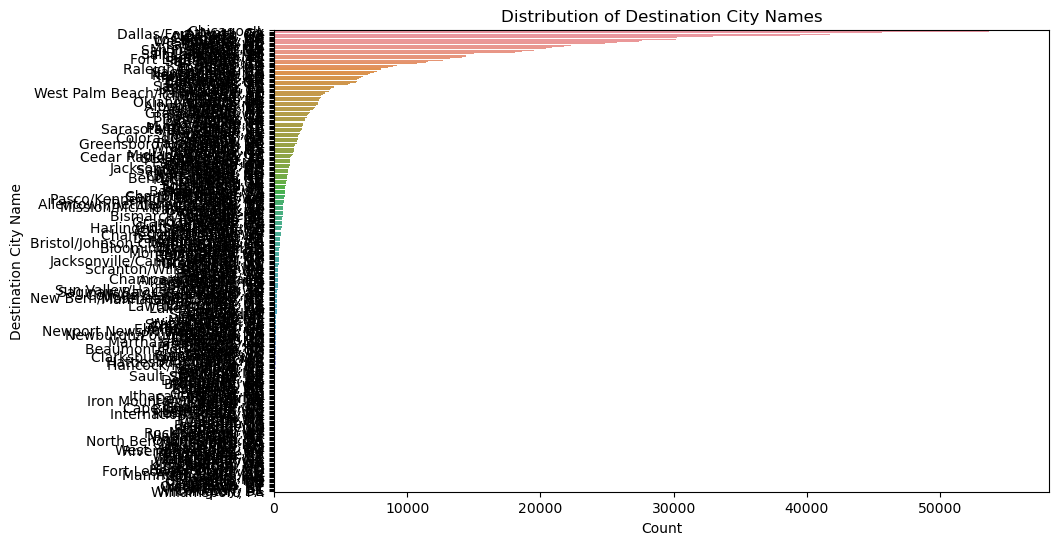

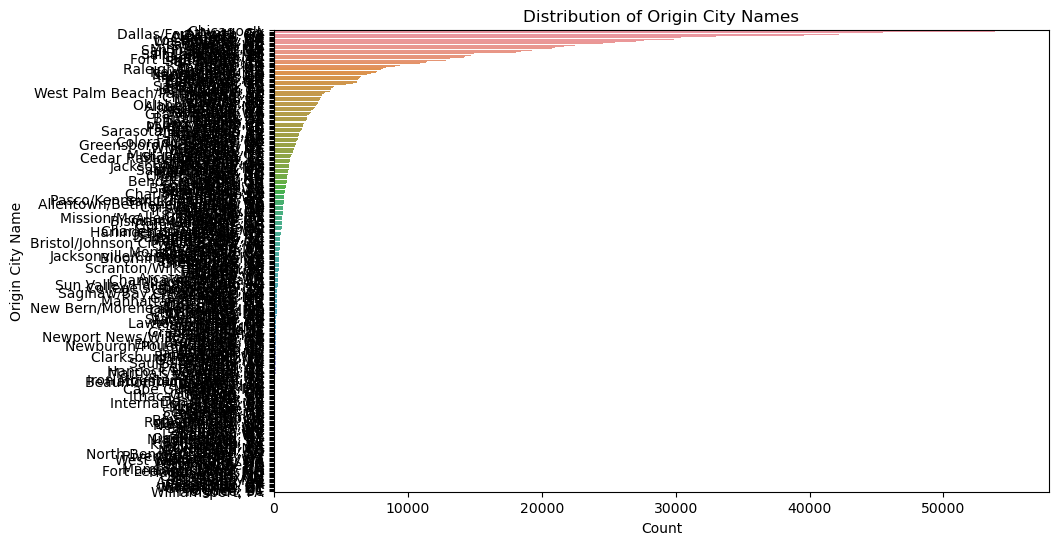

In [119]:
# Plotting the distribution of DEST_CITY_NAME
plt.figure(figsize=(10, 6))
sns.countplot(data=Flight_Full, y='DEST_CITY', order=Flight_Full['DEST_CITY'].value_counts().index)
plt.title('Distribution of Destination City Names')
plt.xlabel('Count')
plt.ylabel('Destination City Name')
plt.show()

# Plotting the distribution of ORIGIN_CITY_NAME
plt.figure(figsize=(10, 6))
sns.countplot(data=Flight_Full, y='ORIGIN_CITY', order=Flight_Full['ORIGIN_CITY'].value_counts().index)
plt.title('Distribution of Origin City Names')
plt.xlabel('Count')
plt.ylabel('Origin City Name')
plt.show()

# Q. 8

In [121]:
# Selecting the specified attributes for the first set of variables
attributes_set1 = ['CRS_DEP_TIME', 'DEP_TIME', 'TAXI_OUT', 'WHEELS_OFF', 'DEP_DELAY']

# Selecting the specified attributes for the second set of variables
attributes_set2 = ['WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'DISTANCE', 'ARR_DELAY']

# Creating subsets of the DataFrame with the selected attributes
data_set1 = Flight_Full[attributes_set1]
data_set2 = Flight_Full[attributes_set2]

# Calculating correlation matrix for the first set of variables
correlation_matrix_set1 = data_set1.corr()

# Calculating correlation matrix for the second set of variables
correlation_matrix_set2 = data_set2.corr()

# Printing correlation matrix for the first set of variables
print("Correlation Matrix for the first set of variables:")
print(correlation_matrix_set1)

# Printing correlation matrix for the second set of variables
print("\nCorrelation Matrix for the second set of variables:")
print(correlation_matrix_set2)

Correlation Matrix for the first set of variables:
              CRS_DEP_TIME  DEP_TIME  TAXI_OUT  WHEELS_OFF  DEP_DELAY
CRS_DEP_TIME      1.000000  0.954561  0.000365    0.927001   0.093141
DEP_TIME          0.954561  1.000000  0.009480    0.970253   0.121064
TAXI_OUT          0.000365  0.009480  1.000000    0.034128   0.052633
WHEELS_OFF        0.927001  0.970253  0.034128    1.000000   0.112504
DEP_DELAY         0.093141  0.121064  0.052633    0.112504   1.000000

Correlation Matrix for the second set of variables:
              WHEELS_ON   TAXI_IN  CRS_ARR_TIME  DISTANCE  ARR_DELAY
WHEELS_ON      1.000000 -0.003493      0.850502  0.013062   0.029339
TAXI_IN       -0.003493  1.000000     -0.006010  0.075290   0.113353
CRS_ARR_TIME   0.850502 -0.006010      1.000000  0.020479   0.072688
DISTANCE       0.013062  0.075290      0.020479  1.000000   0.000839
ARR_DELAY      0.029339  0.113353      0.072688  0.000839   1.000000


### Plotting Correlation in a heatmap for better visualization

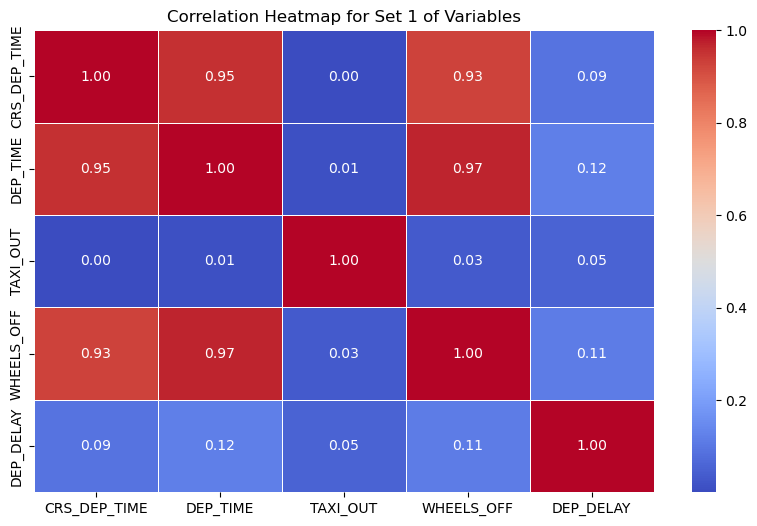

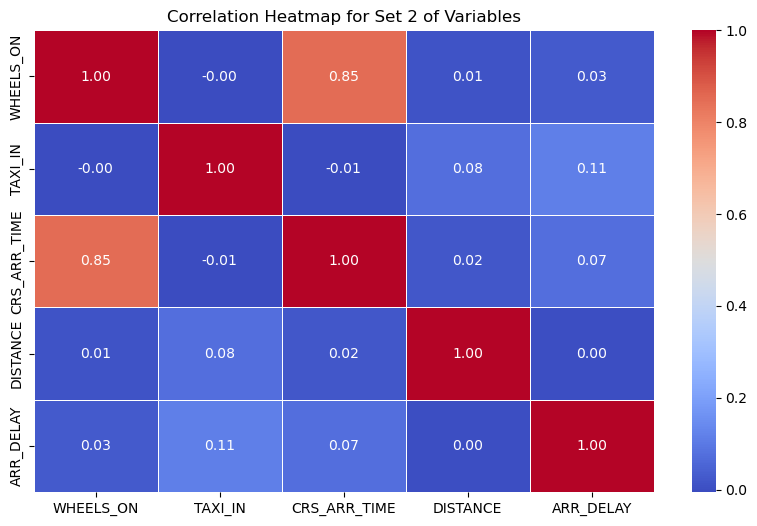

In [122]:
# Plotting correlation heatmap for the first set of variables
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_set1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Set 1 of Variables')
plt.show()

# Plotting correlation heatmap for the second set of variables
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_set2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Set 2 of Variables')
plt.show()

For the first set of variables (CRS_DEP_TIME, DEP_TIME, TAXI_OUT, WHEELS_OFF, DEP_DELAY)
CRS_DEP_TIME and DEP_TIME: There is a strong positive linear relationship with a correlation coefficient of approximately 0.95. This indicates that there is a high degree of association between the scheduled departure time (CRS_DEP_TIME) and the actual departure time (DEP_TIME), suggesting that flights tend to depart close to their scheduled times.
CRS_DEP_TIME and WHEELS_OFF: There is a strong positive linear relationship with a correlation coefficient of approximately 0.93. This suggests that there is a strong association between the scheduled departure time (CRS_DEP_TIME) and the time at which the aircraft's wheels leave the ground (WHEELS_OFF).
DEP_TIME and WHEELS_OFF: There is a strong positive linear relationship with a correlation coefficient of approximately 0.97. This indicates that there is a high degree of association between the actual departure time (DEP_TIME) and the time at which the aircraft's wheels leave the ground (WHEELS_OFF), suggesting that flights tend to take off shortly after they depart.
TAXI_OUT and WHEELS_OFF: There is a weak positive linear relationship with a correlation coefficient of approximately 0.03. This suggests that there is little association between the time it takes for an aircraft to taxi out (TAXI_OUT) and the time at which the aircraft's wheels leave the ground (WHEELS_OFF).
DEP_DELAY and other variables: There are relatively low correlation coefficients for DEP_DELAY with CRS_DEP_TIME, DEP_TIME, TAXI_OUT, and WHEELS_OFF, ranging from approximately 0.09 to 0.12. This suggests a weak positive linear relationship between departure delay and these variables, indicating that delays in departure are only moderately associated with the scheduled and actual departure times, taxi-out time, and wheels-off time.

For the second set of variables (WHEELS_ON, TAXI_IN, CRS_ARR_TIME, DISTANCE, ARR_DELAY):
WHEELS_ON and CRS_ARR_TIME: There is a strong positive linear relationship with a correlation coefficient of approximately 0.85. This suggests that there is a high degree of association between the time at which the aircraft's wheels touch down (WHEELS_ON) and the scheduled arrival time (CRS_ARR_TIME).
ARR_DELAY and other variables: There are relatively low correlation coefficients for ARR_DELAY with WHEELS_ON, TAXI_IN, CRS_ARR_TIME, and DISTANCE, ranging from approximately 0.03 to 0.11. This suggests a weak positive linear relationship between arrival delay and these variables, indicating that delays in arrival are only moderately associated with the time at which the aircraft's wheels touch down, taxi-in time, scheduled arrival time, and flight distance.

# Q. 9

In the realm of data wrangling, imputation serves as a fundamental technique for handling missing data, an issue commonly encountered in real-world datasets. The concept revolves around the idea of replacing missing values with estimated or calculated values based on the available information within the dataset. Imputation is crucial as missing data can hinder the effectiveness of analysis and modeling efforts, potentially leading to biased results and inaccurate conclusions.
Several techniques are employed in imputing data, each with its strengths and weaknesses. One prevalent approach is mean imputation, where missing values are replaced with the mean of the available data for the respective attribute. This method is straightforward and easy to implement, maintaining the overall distribution of the data. However, it may introduce bias, especially if the missing values are not missing at random, and it does not account for the variability in the dataset.
Another common technique is median imputation, which involves replacing missing values with the median of the available data. This approach is robust to outliers and skewed distributions compared to mean imputation, making it suitable for variables with non-normal distributions. However, like mean imputation, it does not consider relationships between variables and may not accurately capture the underlying data patterns.
Furthermore, mode imputation replaces missing values with the mode, or the most frequently occurring value, of the attribute. Mode imputation is particularly useful for categorical variables, preserving the original category frequencies. Nevertheless, it may not be suitable for continuous variables and can underestimate variability.
Beyond these basic imputation methods, more advanced techniques exist, including k-nearest neighbors (KNN) imputation, regression imputation, and multiple imputation. KNN imputation involves estimating missing values based on the values of the nearest neighbors in the feature space, allowing for consideration of variable relationships. Regression imputation utilizes regression models to predict missing values based on other variables in the dataset, capturing complex dependencies. Multiple imputation generates multiple imputed datasets, each with different imputed values, to account for uncertainty in the imputation process and produce more accurate results.
In conclusion, imputation plays a crucial role in data wrangling by addressing missing data issues and ensuring the integrity of the analysis. While various imputation techniques are available, the choice of method depends on the nature of the data, the distribution of missing values, and the specific analysis goals. By carefully selecting and implementing appropriate imputation techniques, data scientists can effectively handle missing data and derive meaningful insights from their datasets.

# Q. 10

In [123]:
#calling a function for attributes with missing ealier we defined earlier
attributes_with_missing_values

DEP_DELAY                    27056
TAXI_OUT                     27471
TAXI_IN                      27866
ARR_DELAY                    30005
CRS_ELAPSED_TIME                 7
ELAPSED_TIME                 30005
AIR_TIME                     30005
DELAY_DUE_CARRIER           861303
DELAY_DUE_WEATHER           768965
DELAY_DUE_NAS               768965
DELAY_DUE_SECURITY          768965
DELAY_DUE_LATE_AIRCRAFT     768966
DEP_TIME                     27047
WHEELS_OFF                   27472
WHEELS_ON                    27866
CRS_ARR_TIME                     1
ARR_TIME                     27866
CANCELLATION_CODE          1020978
CANCELLED                        1
dtype: int64

In [124]:
# #sorting them out by descending order
attributes_with_missing_values_sorted = attributes_with_missing_values.sort_values(ascending=False)

#Displaying sorted values
attributes_with_missing_values_sorted

CANCELLATION_CODE          1020978
DELAY_DUE_CARRIER           861303
DELAY_DUE_LATE_AIRCRAFT     768966
DELAY_DUE_NAS               768965
DELAY_DUE_WEATHER           768965
DELAY_DUE_SECURITY          768965
ARR_DELAY                    30005
ELAPSED_TIME                 30005
AIR_TIME                     30005
WHEELS_ON                    27866
TAXI_IN                      27866
ARR_TIME                     27866
WHEELS_OFF                   27472
TAXI_OUT                     27471
DEP_DELAY                    27056
DEP_TIME                     27047
CRS_ELAPSED_TIME                 7
CRS_ARR_TIME                     1
CANCELLED                        1
dtype: int64

In [125]:
#However, since the first attribute, 'CANCELLATION_CODE' is an object and thus quantitative analysis cannot be performed on
#it, I replaced it with the next highest attribute which is a numerical variable

#Calculating mean, median, and mode for each attribute
mean_delay_due_security = Flight_Full['DELAY_DUE_SECURITY'].mean()
mean_delay_due_carrier = Flight_Full['DELAY_DUE_CARRIER'].mean()
mean_delay_due_late_aircraft = Flight_Full['DELAY_DUE_LATE_AIRCRAFT'].mean()

median_delay_due_security = Flight_Full['DELAY_DUE_SECURITY'].median()
median_delay_due_late_aircraft = Flight_Full['DELAY_DUE_LATE_AIRCRAFT'].median()
median_delay_due_carrier = Flight_Full['DELAY_DUE_CARRIER'].median()

mode_delay_due_carrier = Flight_Full['DELAY_DUE_CARRIER'].mode()[0]
mode_delay_due_security = Flight_Full['DELAY_DUE_SECURITY'].mode()[0]
mode_delay_due_late_aircraft = Flight_Full['DELAY_DUE_LATE_AIRCRAFT'].mode()[0]

In [126]:
#Previewing a sample from the computation to check for correctness
mean_delay_due_carrier

24.554957494980563

In [127]:
# Performing mean imputation
delay_due_security_mean_imputation= Flight_Full['DELAY_DUE_SECURITY'].fillna(mean_delay_due_security)
delay_due_carrier_mean_imputation= Flight_Full['DELAY_DUE_CARRIER'].fillna(mean_delay_due_carrier)
delay_due_late_aircraft_mean_imputation= Flight_Full['DELAY_DUE_LATE_AIRCRAFT'].fillna(mean_delay_due_late_aircraft)

#Performing median imputation
Flight_Full_median_imputation02= Flight_Full['DELAY_DUE_SECURITY'].fillna(median_delay_due_security)
Flight_Full_median_imputation01= Flight_Full['DELAY_DUE_CARRIER'].fillna(median_delay_due_carrier)
Flight_Full_median_imputation= Flight_Full['DELAY_DUE_LATE_AIRCRAFT'].fillna(median_delay_due_late_aircraft)

#Performing mode imputation
Flight_Full_mode_imputation02= Flight_Full['DELAY_DUE_SECURITY'].fillna(mode_delay_due_security)
Flight_Full_mode_imputation01= Flight_Full['DELAY_DUE_CARRIER'].fillna(mode_delay_due_carrier)
Flight_Full_mode_imputation= Flight_Full['DELAY_DUE_LATE_AIRCRAFT'].fillna(mode_delay_due_late_aircraft)

# Q. 11

In [128]:
# Combining the three imputed mean columns into one DataFrame
combined_mean_imputation = pd.DataFrame({
    'delay_due_security_mean_imputation': delay_due_security_mean_imputation,
    'delay_due_carrier_mean_imputation': delay_due_carrier_mean_imputation,
    'delay_due_late_aircraft_mean_imputation': delay_due_late_aircraft_mean_imputation})

In [129]:
#Exporting mean imputation table to csv
combined_mean_imputation.to_csv('Mean_Imputation.csv',index=False)

# Q. 12

In [130]:
# Calculating descriptive statistics for all the numerical attributes
descriptive_stats = Flight_Full[numerical_attributes].describe()

print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
          DEP_DELAY      TAXI_OUT       TAXI_IN     ARR_DELAY  \
count  1.021519e+06  1.021104e+06  1.020709e+06  1.018570e+06   
mean   1.012274e+01  1.664025e+01  7.680054e+00  4.262108e+00   
std    4.885414e+01  9.208593e+00  6.274074e+00  5.082854e+01   
min   -8.200000e+01  1.000000e+00  1.000000e+00 -9.600000e+01   
25%   -6.000000e+00  1.100000e+01  4.000000e+00 -1.600000e+01   
50%   -2.000000e+00  1.400000e+01  6.000000e+00 -7.000000e+00   
75%    6.000000e+00  1.900000e+01  9.000000e+00  7.000000e+00   
max    2.690000e+03  1.840000e+02  2.490000e+02  2.685000e+03   

       CRS_ELAPSED_TIME  ELAPSED_TIME      AIR_TIME      DISTANCE  \
count      1.048568e+06  1.018570e+06  1.018570e+06  1.048575e+06   
mean       1.422071e+02  1.365674e+02  1.122599e+02  8.088263e+02   
std        7.151879e+01  7.166583e+01  6.973204e+01  5.876740e+02   
min        2.000000e+01  1.500000e+01  8.000000e+00  2.900000e+01   
25%        9.000000e+01  8.400000e+01  6.1000

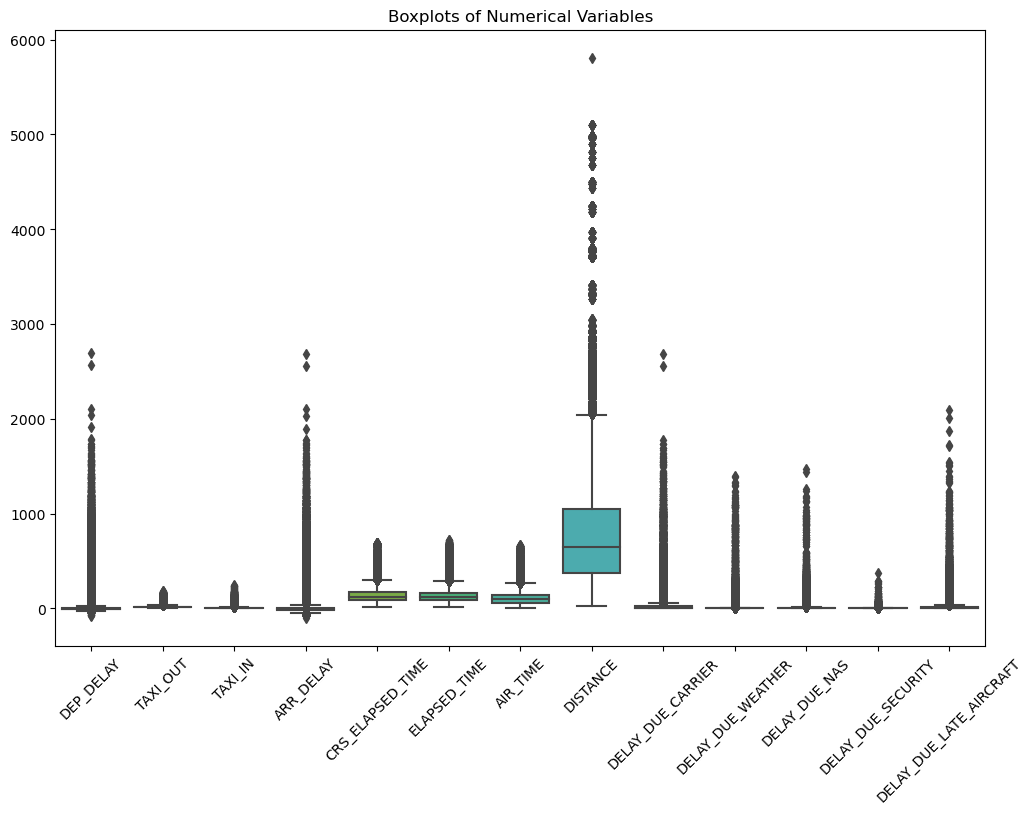

In [131]:
# Creating a boxplot to easily identify outliers 
plt.figure(figsize=(12, 8))
sns.boxplot(data=Flight_Full[numerical_attributes])
plt.title('Boxplots of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

Significant outliers were observed in the variables, DISTANCE, DEP_DELAY, ARR_DELAY, DELAY_DUE_CARRIER, 
DELAY_DUE_WEATHER, DELAY_DUE_NAS and DELAY_DUE_LATE_AIRCRAFT through the aid of the boxplot. There were others with 
less significant outliers in the range. 

# Q. 13

In [132]:
# Calculating the interquartile range (IQR) for 'DISTANCE' and 'DEP_DELAY'
Q1_distance = Flight_Full['DISTANCE'].quantile(0.25)
Q3_distance = Flight_Full['DISTANCE'].quantile(0.75)
IQR_distance = Q3_distance - Q1_distance

Q1_dep_delay = Flight_Full['DEP_DELAY'].quantile(0.25)
Q3_dep_delay = Flight_Full['DEP_DELAY'].quantile(0.75)
IQR_dep_delay = Q3_dep_delay - Q1_dep_delay

# Defining lower and upper bounds for outlier detection
lower_bound_distance = Q1_distance - 1.5 * IQR_distance
upper_bound_distance = Q3_distance + 1.5 * IQR_distance

lower_bound_dep_delay = Q1_dep_delay - 1.5 * IQR_dep_delay
upper_bound_dep_delay = Q3_dep_delay + 1.5 * IQR_dep_delay

# Identify outliers
outliers_distance = Flight_Full[(Flight_Full['DISTANCE'] < lower_bound_distance) | (Flight_Full['DISTANCE'] > upper_bound_distance)]
outliers_dep_delay = Flight_Full[(Flight_Full['DEP_DELAY'] < lower_bound_dep_delay) | (Flight_Full['DEP_DELAY'] > upper_bound_dep_delay)]

# Removing outliers
Flight_Full_cleaned = Flight_Full[~((Flight_Full['DISTANCE'] < lower_bound_distance) | (Flight_Full['DISTANCE'] > upper_bound_distance))]
Flight_Full_cleaned = Flight_Full_cleaned[~((Flight_Full_cleaned['DEP_DELAY'] < lower_bound_dep_delay) | (Flight_Full_cleaned['DEP_DELAY'] > upper_bound_dep_delay))]

# Print information about removed outliers
print("Removed outliers for 'DISTANCE':")
print(outliers_distance)
print("\nRemoved outliers for 'DEP_DELAY':")
print(outliers_dep_delay)

# Print the shape of the cleaned dataset
print("\nShape of cleaned dataset after removing outliers:", Flight_Full_cleaned.shape)


Removed outliers for 'DISTANCE':
         DEP_DELAY  TAXI_OUT  TAXI_IN  ARR_DELAY  CRS_ELAPSED_TIME  \
78            18.0      21.0      3.0        0.0             353.0   
83             7.0      18.0      5.0      -27.0             368.0   
98            -7.0      10.0     10.0      -26.0             302.0   
112           -4.0      13.0      6.0      -31.0             319.0   
120           -4.0      20.0     13.0       18.0             320.0   
...            ...       ...      ...        ...               ...   
1048463       -3.0      13.0      2.0      -34.0             340.0   
1048495       -4.0      27.0     20.0      -12.0             360.0   
1048527       -3.0      15.0     24.0       -9.0             351.0   
1048546        7.0      30.0     11.0       16.0             280.0   
1048565      -13.0      14.0      4.0      -19.0             330.0   

         ELAPSED_TIME  AIR_TIME  DISTANCE  DELAY_DUE_CARRIER  \
78              335.0     311.0      2370             1182.0  

In [133]:
#Previewing dataset with outliers removed
Flight_Full 

,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,...,DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,ARR_TIME,CANCELLATION_CODE,DOT_CODE,FL_NUMBER,CANCELLED,DIVERTED
0,-4.0,19.0,4.0,-14.0,186.0,176.0,153.0,1065,2685.0,0.0,...,1151.0,1210.0,1443.0,1501.0,1447.0,NaN,19977,1562,0.0,0
1,-6.0,9.0,38.0,-5.0,235.0,236.0,189.0,1399,2556.0,0.0,...,2114.0,2123.0,2232.0,2315.0,2310.0,NaN,19790,1149,0.0,0
2,6.0,20.0,5.0,0.0,118.0,112.0,87.0,680,1781.0,NaN,...,1000.0,1020.0,1247.0,1252.0,1252.0,NaN,19977,459,0.0,0
3,-1.0,27.0,9.0,24.0,260.0,285.0,249.0,1589,1736.0,NaN,...,1608.0,1635.0,1844.0,1829.0,1853.0,NaN,19790,2295,0.0,0
4,-2.0,15.0,14.0,-1.0,181.0,182.0,153.0,985,1732.0,0.0,...,1838.0,1853.0,2026.0,2041.0,2040.0,NaN,20416,407,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,70.0,11.0,3.0,55.0,120.0,105.0,91.0,621,NaN,NaN,...,2140.0,2151.0,2322.0,2230.0,2325.0,NaN,19805,2108,0.0,0
1048571,-10.0,13.0,7.0,-3.0,157.0,164.0,144.0,780,NaN,NaN,...,1120.0,1133.0,1357.0,1407.0,1404.0,NaN,20363,5482,0.0,0
1048572,-5.0,12.0,5.0,-18.0,122.0,109.0,92.0,644,NaN,NaN,...,1440.0,1452.0,1624.0,1647.0,1629.0,NaN,19805,2345,0.0,0
1048573,65.0,18.0,9.0,65.0,132.0,132.0,105.0,710,NaN,NaN,...,2040.0,2058.0,2243.0,2147.0,2252.0,NaN,20398,3754,0.0,0


# Q. 14

Given the nature of the attributes and the need to retain their information while reducing cardinality, the most suitable approach is frequency-based encoding. By encoding each unique value with its frequency count, we can retain the information present in the attributes while reducing their cardinality.Frequency-based encoding replaces each unique value in the attribute with its frequency or count within the dataset. This approach retains the information present in the attribute while reducing its cardinality. It can be effective if the frequency of occurrence of each value is meaningful for the analysis.

In [134]:
#Making a copy of the dataset 
Flight_Full_copy1 = Flight_Full.copy()

# List of attributes with high cardinality
attributes_with_high_cardinality = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 
                                    'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

# Perform frequency-based encoding
for attribute in attributes_with_high_cardinality:
    frequency_encoding = Flight_Full_copy1[attribute].value_counts(normalize=True)
    Flight_Full[attribute + '_encoded'] = Flight_Full[attribute].map(frequency_encoding)

# Drop the original attributes
Flight_Full_copy1.drop(columns=attributes_with_high_cardinality, inplace=True)

# Print the first few rows of the DataFrame to verify the changes
print(Flight_Full_copy1.head())


C:\Users\Manuel\AppData\Local\Temp\ipykernel_9572\2704499015.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Flight_Full[attribute + '_encoded'] = Flight_Full[attribute].map(frequency_encoding)


   DEP_DELAY  TAXI_OUT  TAXI_IN  ARR_DELAY  CRS_ELAPSED_TIME  ELAPSED_TIME  \
0       -4.0      19.0      4.0      -14.0             186.0         176.0   
1       -6.0       9.0     38.0       -5.0             235.0         236.0   
2        6.0      20.0      5.0        0.0             118.0         112.0   
3       -1.0      27.0      9.0       24.0             260.0         285.0   
4       -2.0      15.0     14.0       -1.0             181.0         182.0   

   AIR_TIME  DISTANCE     FL_DATE                AIRLINE  ... DEP_TIME  \
0     153.0      1065    1/9/2019  United Air Lines Inc.  ...   1151.0   
1     189.0      1399  11/19/2022   Delta Air Lines Inc.  ...   2114.0   
2      87.0       680   7/22/2022  United Air Lines Inc.  ...   1000.0   
3     249.0      1589    3/6/2023   Delta Air Lines Inc.  ...   1608.0   
4     153.0       985   2/23/2020       Spirit Air Lines  ...   1838.0   

  WHEELS_OFF WHEELS_ON CRS_ARR_TIME ARR_TIME CANCELLATION_CODE  DOT_CODE  \
0     1210

# Q. 15

In [135]:
# Separate the features (X) and target variable (y)
X = Flight_Full.drop(columns=['DELAY_DUE_WEATHER', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'DELAY_DUE_NAS'])
y_weather = Flight_Full['DELAY_DUE_WEATHER']
y_security = Flight_Full['DELAY_DUE_SECURITY']
y_late_aircraft = Flight_Full['DELAY_DUE_LATE_AIRCRAFT']
y_nas = Flight_Full['DELAY_DUE_NAS']

# Find the class with fewer samples
minority_class = min(y_weather.value_counts().index.min(), y_security.value_counts().index.min(), 
                     y_late_aircraft.value_counts().index.min(), y_nas.value_counts().index.min())

# Calculate the difference in class sizes
class_sizes = [len(y_weather), len(y_security), len(y_late_aircraft), len(y_nas)]
min_size = min(class_sizes)

# Oversample the minority class to match the size of the majority class
y_weather_oversampled = pd.concat([y_weather] * (min_size // len(y_weather)) + [y_weather.sample(min_size % len(y_weather))])
y_security_oversampled = pd.concat([y_security] * (min_size // len(y_security)) + [y_security.sample(min_size % len(y_security))])
y_late_aircraft_oversampled = pd.concat([y_late_aircraft] * (min_size // len(y_late_aircraft)) + [y_late_aircraft.sample(min_size % len(y_late_aircraft))])
y_nas_oversampled = pd.concat([y_nas] * (min_size // len(y_nas)) + [y_nas.sample(min_size % len(y_nas))])

# Print the class distribution before and after resampling
print("Class distribution before resampling:")
print("DELAY_DUE_WEATHER:")
print(y_weather.value_counts())
print("\nDELAY_DUE_SECURITY:")
print(y_security.value_counts())
print("\nDELAY_DUE_LATE_AIRCRAFT:")
print(y_late_aircraft.value_counts())
print("\nDELAY_DUE_NAS:")
print(y_nas.value_counts())

print("\nClass distribution after resampling:")
print("DELAY_DUE_WEATHER:")
print(y_weather_oversampled.value_counts())
print("\nDELAY_DUE_SECURITY:")
print(y_security_oversampled.value_counts())
print("\nDELAY_DUE_LATE_AIRCRAFT:")
print(y_late_aircraft_oversampled.value_counts())
print("\nDELAY_DUE_NAS:")
print(y_nas_oversampled.value_counts())


Class distribution before resampling:
DELAY_DUE_WEATHER:
0.0      268679
15.0        250
5.0         214
17.0        211
6.0         206
          ...  
388.0         1
571.0         1
864.0         1
405.0         1
427.0         1
Name: DELAY_DUE_WEATHER, Length: 542, dtype: int64

DELAY_DUE_SECURITY:
0.0      278631
16.0         36
18.0         36
6.0          35
15.0         34
          ...  
93.0          1
259.0         1
223.0         1
161.0         1
69.0          1
Name: DELAY_DUE_SECURITY, Length: 122, dtype: int64

DELAY_DUE_LATE_AIRCRAFT:
0.0       188466
15.0        2280
17.0        1988
16.0        1962
19.0        1844
           ...  
524.0          1
1075.0         1
940.0          1
821.0          1
1000.0         1
Name: DELAY_DUE_LATE_AIRCRAFT, Length: 686, dtype: int64

DELAY_DUE_NAS:
0.0      189519
1.0        4265
15.0       3605
2.0        3440
3.0        3287
          ...  
284.0         1
429.0         1
983.0         1
396.0         1
522.0         1
Name:

# Q. 16

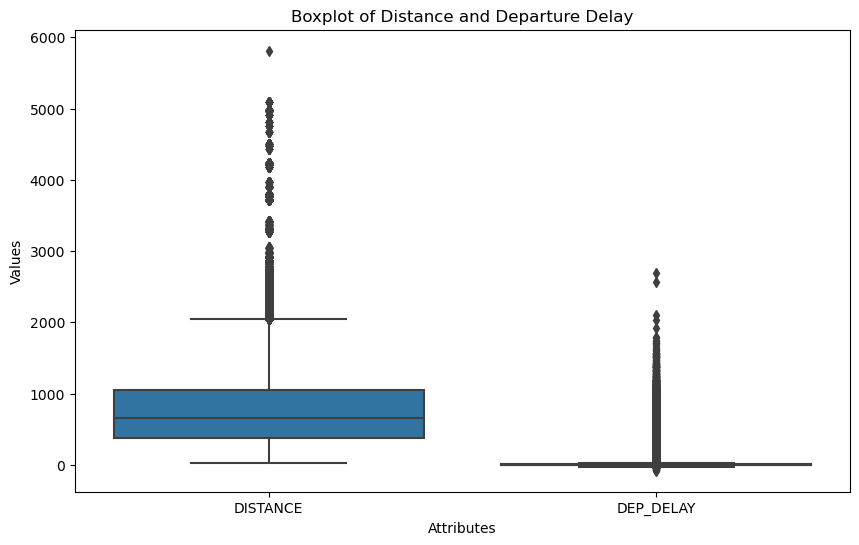

In [136]:
#  the 'DISTANCE' and 'DEP_DELAY' attributes
sampled_objects = Flight_Full[['DISTANCE', 'DEP_DELAY']]

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=sampled_objects)
plt.title('Boxplot of Distance and Departure Delay')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.show()


# Q. 17

In [137]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# # Define the attributes
# attributes = ['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY']

# # Method 1: Min-Max Scaling
# min_max_scaler = MinMaxScaler()
# min_max_scaled_data = min_max_scaler.fit_transform(Flight_Full[attributes])

# # Method 2: Standardization
# standard_scaler = StandardScaler()
# standard_scaled_data = standard_scaler.fit_transform(Flight_Full[attributes])

# # Convert the scaled data back to a DataFrame for easier analysis
# min_max_scaled_df = pd.DataFrame(min_max_scaled_data, columns=attributes)
# standard_scaled_df = pd.DataFrame(standard_scaled_data, columns=attributes)

# # Print the first few rows of the scaled DataFrames
# print("Min-Max Scaled Data:")
# print(min_max_scaled_df.head())

# print("\nStandard Scaled Data:")
# print(standard_scaled_df.head())


# Q. 18

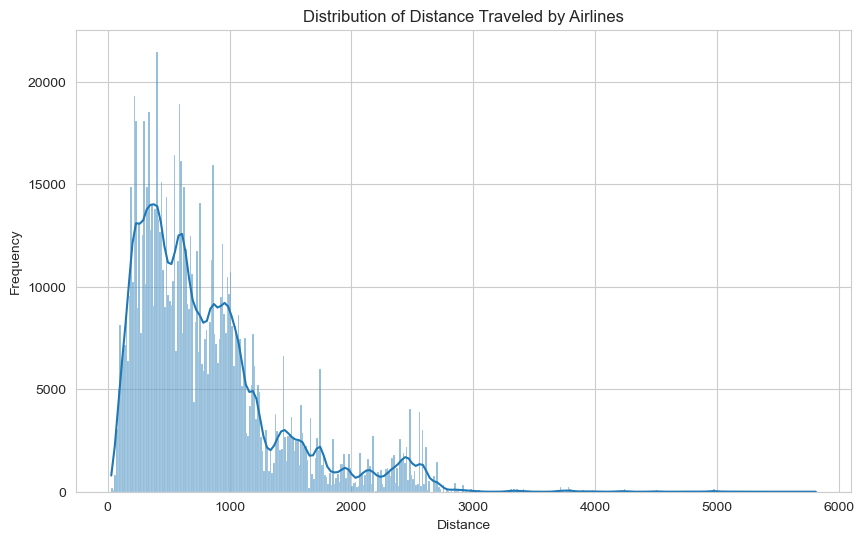

In [138]:
# Set the style of the seaborn plots
sns.set_style('whitegrid')

# Create a histogram or KDE plot of the 'DISTANCE' attribute
plt.figure(figsize=(10, 6))
sns.histplot(data=Flight_Full, x='DISTANCE', kde=True)
plt.title('Distribution of Distance Traveled by Airlines')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()